# Solution Sklearn // Beau

### === Task 1 ===

1. Load the sklearn boston dataset.  And perform a simple linear regression. Make sure to split your data into training and testing set. A common measure to evaluate the prediction is to use MSE and R^2 which is also available in sklearn, but you have to do some research.

In [6]:
# Load dataset
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [8]:
# Split Train Test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(379, 13) (379,)
(127, 13) (127,)


In [9]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# Fit the model
model.fit(Xtrain, ytrain)

# Test the model
y_model = model.predict(Xtest)   

In [15]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(ytest, y_model)
r2 = r2_score(ytest, y_model)
print("MSE: ", MSE)
print("r2: ", r2)

MSE:  21.89776539604944
r2:  0.7789410172622864


2. Load the sklearn breast cancer dataset.  And perform a simple classification using Naive Bayes. Make sure to split your data into training and testing set. Calculate the accuracy.  

In [18]:
# Load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y = True)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [19]:
# Split Train Test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(426, 30) (426,)
(143, 30) (143,)


In [21]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB()

In [22]:
# Fit the model
model.fit(Xtrain, ytrain)

# Test the model
y_model = model.predict(Xtest)   

In [23]:
# Evaluate the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc)

Accuracy:  0.9440559440559441


### === Task 2 ===

1. Load the sklearn make_blobs dataset with 4 centers. Then, perform a clustering.  Then plot each cluster with distinct colors.

(400, 2)
(400,)


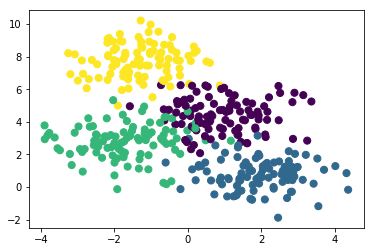

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Create dataset
X, y = make_blobs(n_samples=400, centers=4, n_features=2, random_state=0)
print(X.shape)
print(y.shape)

In [30]:
# Split Train Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(300, 2) (300,)
(100, 2) (100,)


In [31]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB()

In [32]:
# Fit the model
model.fit(Xtrain, ytrain)

# Test the model
y_model = model.predict(Xtest)   

In [33]:
# Evaluate the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc)

Accuracy:  0.93


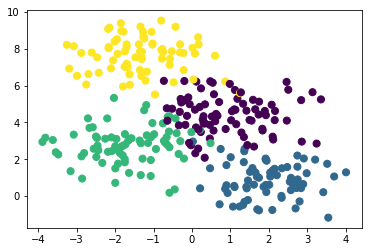

In [35]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], s=50, c=ytrain, label = "Train")
plt.title("Train")

Text(0.5,1,'Test')

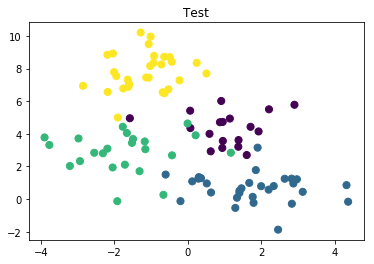

In [37]:
plt.scatter(Xtest[:, 0], Xtest[:, 1], s=50, c=ytest, label = "Test")
plt.title("Test")

2. Load the sklearn breast cancer dataset. Using the first 4 components from PCA, classify the data with a SVM model. Then, compare the accuracy with when we only use SVM (no PCA).  

In [53]:
# Load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y = True)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [54]:
# Perform PCA
from sklearn.decomposition import PCA 
model = PCA(n_components=4)   
model.fit(X)   
X_PCA  = model.transform(X)  

In [55]:
# Split Train Test 

# PCA
Xtrain_PCA, Xtest_PCA, ytrain_PCA, ytest_PCA = train_test_split(X_PCA, y,
                                                random_state=1)
print(Xtrain_PCA.shape, ytrain_PCA.shape)
print(Xtest_PCA.shape, ytest_PCA.shape)

# Without PCA
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)


(426, 4) (426,)
(143, 4) (143,)
(426, 30) (426,)
(143, 30) (143,)


In [56]:
# SVM model
from sklearn import svm

# Fit the model PCA
model_PCA = svm.SVC(kernel='linear').fit(Xtrain_PCA, ytrain_PCA)

# Fit the model without PCA
model = svm.SVC(kernel='linear').fit(Xtrain, ytrain)

# Test the model PCA
y_model_PCA = model_PCA.predict(Xtest_PCA)   

# Test the model without PCA
y_model = model.predict(Xtest)   

In [57]:
# Evaluate the model
from sklearn.metrics import accuracy_score
acc_PCA = accuracy_score(ytest_PCA, y_model_PCA)
print("Accuracy PCA: ", acc_PCA)

acc = accuracy_score(ytest, y_model)
print("Accuracy without PCA: ", acc)

Accuracy PCA:  0.9440559440559441
Accuracy without PCA:  0.9370629370629371


 ### === Task 3 ===

1. Try to improve the accuracy of classification of the written digits to exceed 80% using SVC

In [64]:
# Load data
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y = True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [84]:
# PCA
model = PCA(n_components=25)   
model.fit(X)   
X_PCA  = model.transform(X)  

# Split Train Test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_PCA, y, random_state=0)

# Fit the model without PCA
model = svm.SVC(kernel='rbf').fit(Xtrain, ytrain)

# Test the model
y_model = model.predict(Xtest)   

# Evaluate the model
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc)

Accuracy:  0.9955555555555555
